# LOESS Smoothing of Peer Group Data

In this notebook, you will find developmental line graphs using **LOESS Smoothing** for various peer groups. These graphs represent detrended data for three key metrics: **Mean Length of Sentence (MLS)**, **CN_C** (syntactic complexity), and **ErrorToWordRatio**. 

## Specific Graphs Worth Looking At:

1. **Figure 31 - Detrended MLS with LOESS for Group 1 (Arin and Engin)**:  
   This graph provides a clear upward trend in sentence length, showing consistent improvement in writing fluency after detrending and smoothing.

2. **Figure 32 - Detrended CN_C with LOESS for Group 1 (Arin and Engin)**:  
   The increase in syntactic complexity is smooth and progressive, making it an excellent example of syntactic development.

3. **Figure 36 - Detrended ErrorToWordRatio with LOESS for Group 1 (Aysen and Sinem)**:  
   A noticeable decline in error rates is observed here, emphasizing this group's improvement in grammatical accuracy.

4. **Figure 45 - Detrended ErrorToWordRatio with LOESS for Group 1 (Elanur and Ece Berfu)**:  
   This graph shows a stable error ratio, indicating consistent accuracy, but minimal progress in reducing mistakes.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import detrend
import statsmodels.api as sm


# Load the dataset from your local file path
df = pd.read_csv(r'C:\Users\egeme\Desktop\Diss Stuff\Adams Stats Assignment/collaborative.csv')

# List of all peer groups as provided earlier
peer_groups = [
    'G1 Arin Engin', 'G1 Aysen Sinem', 'G1 Cello Ezgi', 'G1 Dilara Sila', 
    'G1 Elanur EceBerfu', 'G1 Helin Senay', 'G1 Nupelda Eda', 'G1 Oyku Cahit', 
    'G1 Selin Zahide', 'G1 Umay Kubra', 'G2 Abidin Osman', 'G2 AleynaCeren', 
    'G2 Ayse Halime', 'G2 Beyza Umur', 'G2 Ceren Mihriban', 'G2 Damla Sumeyye', 
    'G2 Fadime Sura', 'G2 Fatma Eren', 'G2 Songul Esma', 'G2 Zeynep Elif'
]

# Creating individual dataframes for each peer group and storing them in a dictionary
dfs = {}
for group in peer_groups:
    df_name = group.lower().replace(" ", "_") + "_df"
    dfs[df_name] = df[df['Peer'].str.contains(group)]

# Display the dictionary with all dataframes
dfs.keys()

# Assigning each dataframe from the dictionary to its respective variable
g1_arin_engin_df = dfs['g1_arin_engin_df']
g1_aysen_sinem_df = dfs['g1_aysen_sinem_df']
g1_cello_ezgi_df = dfs['g1_cello_ezgi_df']
g1_dilara_sila_df = dfs['g1_dilara_sila_df']
g1_elanur_eceberfu_df = dfs['g1_elanur_eceberfu_df']
g1_helin_senay_df = dfs['g1_helin_senay_df']
g1_nupelda_eda_df = dfs['g1_nupelda_eda_df']
g1_oyku_cahit_df = dfs['g1_oyku_cahit_df']
g1_selin_zahide_df = dfs['g1_selin_zahide_df']
g1_umay_kubra_df = dfs['g1_umay_kubra_df']
g2_abidin_osman_df = dfs['g2_abidin_osman_df']
g2_aleynaceren_df = dfs['g2_aleynaceren_df']
g2_ayse_halime_df = dfs['g2_ayse_halime_df']
g2_beyza_umur_df = dfs['g2_beyza_umur_df']
g2_ceren_mihriban_df = dfs['g2_ceren_mihriban_df']
g2_damla_sumeyye_df = dfs['g2_damla_sumeyye_df']
g2_fadime_sura_df = dfs['g2_fadime_sura_df']
g2_fatma_eren_df = dfs['g2_fatma_eren_df']
g2_songul_esma_df = dfs['g2_songul_esma_df']
g2_zeynep_elif_df = dfs['g2_zeynep_elif_df']

# Creating a list to hold all G1 and G2 dataframes
g1_dataframes = [
    g1_arin_engin_df, g1_aysen_sinem_df, g1_cello_ezgi_df, g1_dilara_sila_df,
    g1_elanur_eceberfu_df, g1_helin_senay_df, g1_nupelda_eda_df,
    g1_oyku_cahit_df, g1_selin_zahide_df, g1_umay_kubra_df
]

g2_dataframes = [
    g2_abidin_osman_df, g2_aleynaceren_df, g2_ayse_halime_df,
    g2_beyza_umur_df, g2_ceren_mihriban_df, g2_damla_sumeyye_df,
    g2_fadime_sura_df, g2_fatma_eren_df, g2_songul_esma_df,
    g2_zeynep_elif_df
]

# Verifying the lists have been created
len(g1_dataframes), len(g2_dataframes)  # Should return 10 for each list

# Load the dataset from your local file path
df = pd.read_csv(r'C:\Users\egeme\Desktop\Diss Stuff\Adams Stats Assignment/collaborative.csv')

# List of all peer groups as provided earlier
peer_groups = [
    'G1 Arin Engin', 'G1 Aysen Sinem', 'G1 Cello Ezgi', 'G1 Dilara Sila', 
    'G1 Elanur EceBerfu', 'G1 Helin Senay', 'G1 Nupelda Eda', 'G1 Oyku Cahit', 
    'G1 Selin Zahide', 'G1 Umay Kubra', 'G2 Abidin Osman', 'G2 AleynaCeren', 
    'G2 Ayse Halime', 'G2 Beyza Umur', 'G2 Ceren Mihriban', 'G2 Damla Sumeyye', 
    'G2 Fadime Sura', 'G2 Fatma Eren', 'G2 Songul Esma', 'G2 Zeynep Elif'
]

# Creating individual dataframes for each peer group and storing them in a dictionary
dfs = {}
for group in peer_groups:
    df_name = group.lower().replace(" ", "_") + "_df"
    dfs[df_name] = df[df['Peer'].str.contains(group)]

# Display the dictionary with all dataframes
dfs.keys()

# Assigning each dataframe from the dictionary to its respective variable
g1_arin_engin_df = dfs['g1_arin_engin_df']
g1_aysen_sinem_df = dfs['g1_aysen_sinem_df']
g1_cello_ezgi_df = dfs['g1_cello_ezgi_df']
g1_dilara_sila_df = dfs['g1_dilara_sila_df']
g1_elanur_eceberfu_df = dfs['g1_elanur_eceberfu_df']
g1_helin_senay_df = dfs['g1_helin_senay_df']
g1_nupelda_eda_df = dfs['g1_nupelda_eda_df']
g1_oyku_cahit_df = dfs['g1_oyku_cahit_df']
g1_selin_zahide_df = dfs['g1_selin_zahide_df']
g1_umay_kubra_df = dfs['g1_umay_kubra_df']
g2_abidin_osman_df = dfs['g2_abidin_osman_df']
g2_aleynaceren_df = dfs['g2_aleynaceren_df']
g2_ayse_halime_df = dfs['g2_ayse_halime_df']
g2_beyza_umur_df = dfs['g2_beyza_umur_df']
g2_ceren_mihriban_df = dfs['g2_ceren_mihriban_df']
g2_damla_sumeyye_df = dfs['g2_damla_sumeyye_df']
g2_fadime_sura_df = dfs['g2_fadime_sura_df']
g2_fatma_eren_df = dfs['g2_fatma_eren_df']
g2_songul_esma_df = dfs['g2_songul_esma_df']
g2_zeynep_elif_df = dfs['g2_zeynep_elif_df']

# Creating a list to hold all G1 and G2 dataframes
g1_dataframes = [
    g1_arin_engin_df, g1_aysen_sinem_df, g1_cello_ezgi_df, g1_dilara_sila_df,
    g1_elanur_eceberfu_df, g1_helin_senay_df, g1_nupelda_eda_df,
    g1_oyku_cahit_df, g1_selin_zahide_df, g1_umay_kubra_df
]

g2_dataframes = [
    g2_abidin_osman_df, g2_aleynaceren_df, g2_ayse_halime_df,
    g2_beyza_umur_df, g2_ceren_mihriban_df, g2_damla_sumeyye_df,
    g2_fadime_sura_df, g2_fatma_eren_df, g2_songul_esma_df,
    g2_zeynep_elif_df
]

# Verifying the lists have been created
len(g1_dataframes), len(g2_dataframes)  # Should return 10 for each list

# Function to detrend and normalize specific columns in a dataframe
def detrend_and_normalize_columns(df, columns_to_normalize):
    df_detrended = df.copy()  # Make a copy of the original dataframe to avoid modifying it directly
    
    # Loop over all columns and detrend if the column contains numeric data
    for col in df.columns:
        if col in columns_to_normalize:
            if np.issubdtype(df[col].dtype, np.number):  # Check if the column is numeric
                df_detrended[col] = detrend(df[col])
    
    # Normalize the columns to have values between 0 and 1
    scaler = MinMaxScaler()
    df_detrended[columns_to_normalize] = scaler.fit_transform(df_detrended[columns_to_normalize])
    
    return df_detrended

# Columns to detrend and normalize: MLS, CN/C, ErrorToWordRatio
columns_to_normalize = ['MLS', 'CN_C', 'ErrorToWordRatio']

# Detrend and normalize all G1 dataframes
g1_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g1_dataframes]

# Detrend and normalize all G2 dataframes
g2_dataframes_detrended = [detrend_and_normalize_columns(df, columns_to_normalize) for df in g2_dataframes]

# Assign individual detrended and normalized dataframes for G1
g1_arin_engin_df_detrended = g1_dataframes_detrended[0]
g1_aysen_sinem_df_detrended = g1_dataframes_detrended[1]
g1_cello_ezgi_df_detrended = g1_dataframes_detrended[2]
g1_dilara_sila_df_detrended = g1_dataframes_detrended[3]
g1_elanur_eceberfu_df_detrended = g1_dataframes_detrended[4]
g1_helin_senay_df_detrended = g1_dataframes_detrended[5]
g1_nupelda_eda_df_detrended = g1_dataframes_detrended[6]
g1_oyku_cahit_df_detrended = g1_dataframes_detrended[7]
g1_selin_zahide_df_detrended = g1_dataframes_detrended[8]
g1_umay_kubra_df_detrended = g1_dataframes_detrended[9]

# Assign individual detrended and normalized dataframes for G2
g2_abidin_osman_df_detrended = g2_dataframes_detrended[0]
g2_aleynaceren_df_detrended = g2_dataframes_detrended[1]
g2_ayse_halime_df_detrended = g2_dataframes_detrended[2]
g2_beyza_umur_df_detrended = g2_dataframes_detrended[3]
g2_ceren_mihriban_df_detrended = g2_dataframes_detrended[4]
g2_damla_sumeyye_df_detrended = g2_dataframes_detrended[5]
g2_fadime_sura_df_detrended = g2_dataframes_detrended[6]
g2_fatma_eren_df_detrended = g2_dataframes_detrended[7]
g2_songul_esma_df_detrended = g2_dataframes_detrended[8]
g2_zeynep_elif_df_detrended = g2_dataframes_detrended[9]

# Verify detrended and normalized dataframes are created
len(g1_dataframes_detrended), len(g2_dataframes_detrended)  # Should return 10 for each list


(10, 10)

Figure 31. Developmental Line Graph of Detrended MLS with LOESS Smoothing for Group 2 - Abidin and Osman


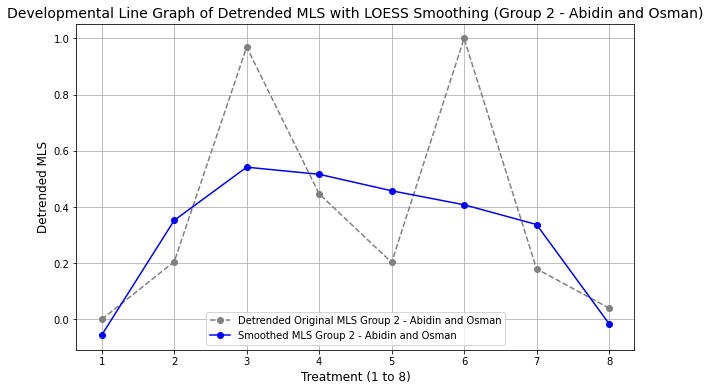

Figure 32. Developmental Line Graph of Detrended CN_C with LOESS Smoothing for Group 2 - Abidin and Osman


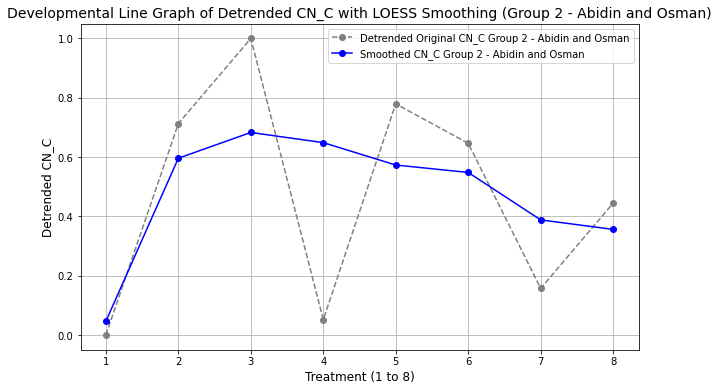

Figure 33. Developmental Line Graph of Detrended ErrorToWordRatio with LOESS Smoothing for Group 2 - Abidin and Osman


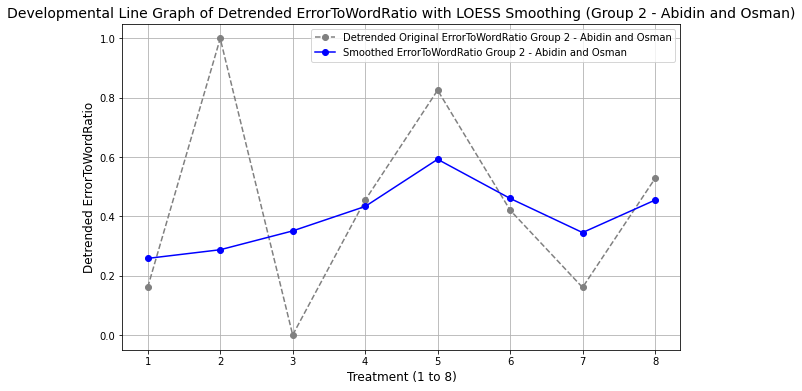

Figure 34. Developmental Line Graph of Detrended MLS with LOESS Smoothing for Group 2 - Aleyna and Ceren


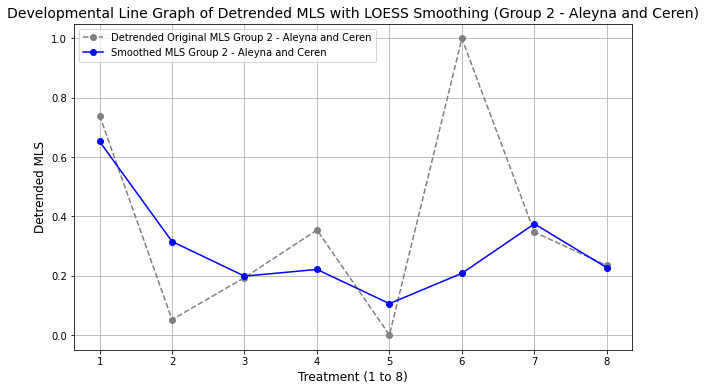

Figure 35. Developmental Line Graph of Detrended CN_C with LOESS Smoothing for Group 2 - Aleyna and Ceren


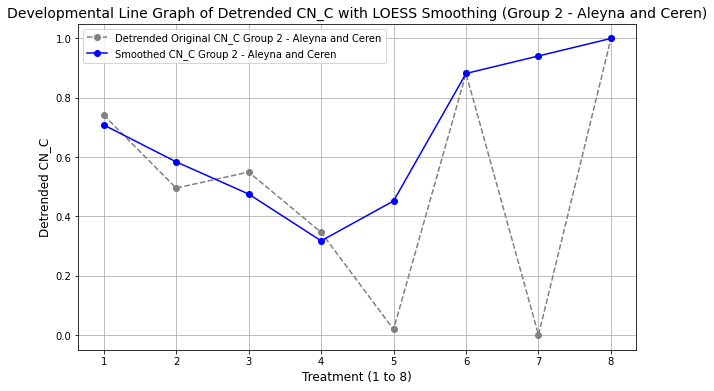

Figure 36. Developmental Line Graph of Detrended ErrorToWordRatio with LOESS Smoothing for Group 2 - Aleyna and Ceren


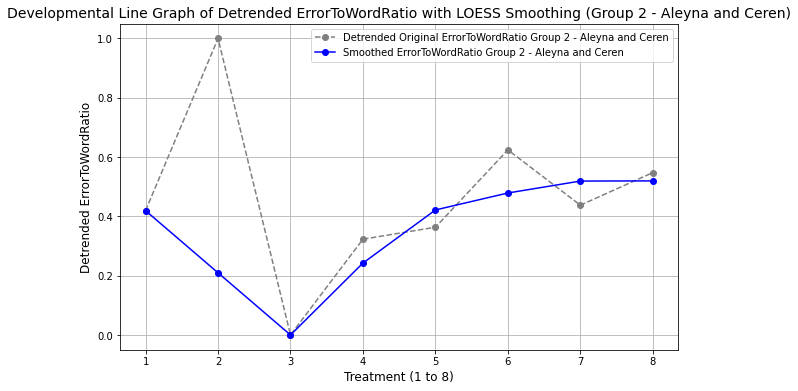

Figure 37. Developmental Line Graph of Detrended MLS with LOESS Smoothing for Group 2 - Ayse and Halime


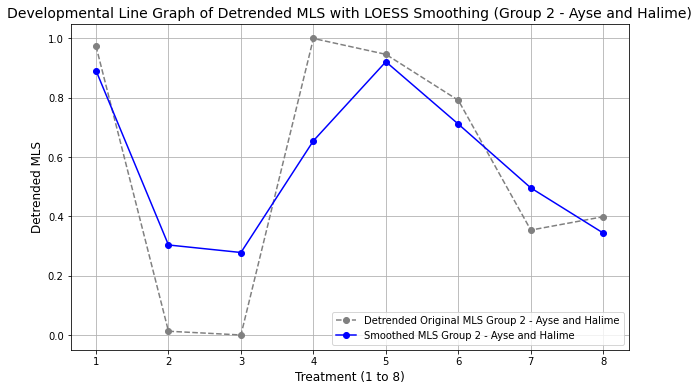

Figure 38. Developmental Line Graph of Detrended CN_C with LOESS Smoothing for Group 2 - Ayse and Halime


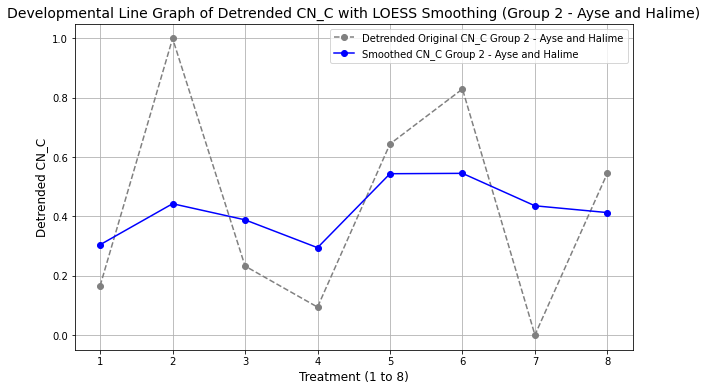

Figure 39. Developmental Line Graph of Detrended ErrorToWordRatio with LOESS Smoothing for Group 2 - Ayse and Halime


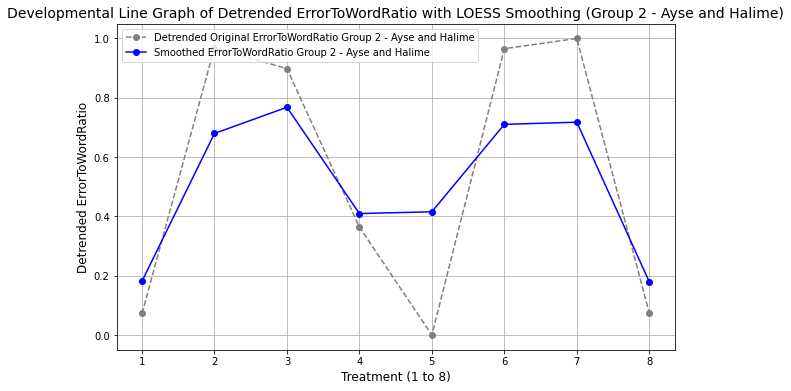

Figure 40. Developmental Line Graph of Detrended MLS with LOESS Smoothing for Group 2 - Beyza and Umur


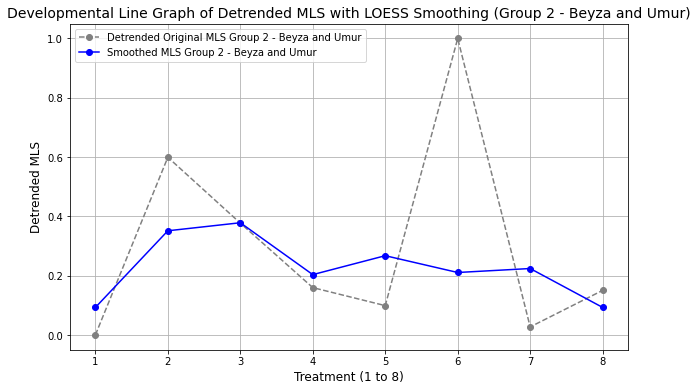

Figure 41. Developmental Line Graph of Detrended CN_C with LOESS Smoothing for Group 2 - Beyza and Umur


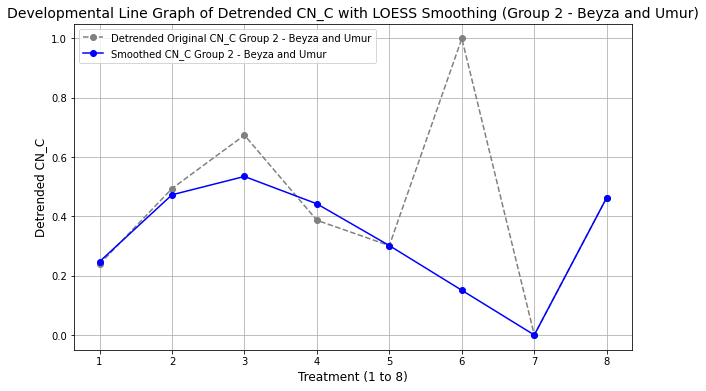

Figure 42. Developmental Line Graph of Detrended ErrorToWordRatio with LOESS Smoothing for Group 2 - Beyza and Umur


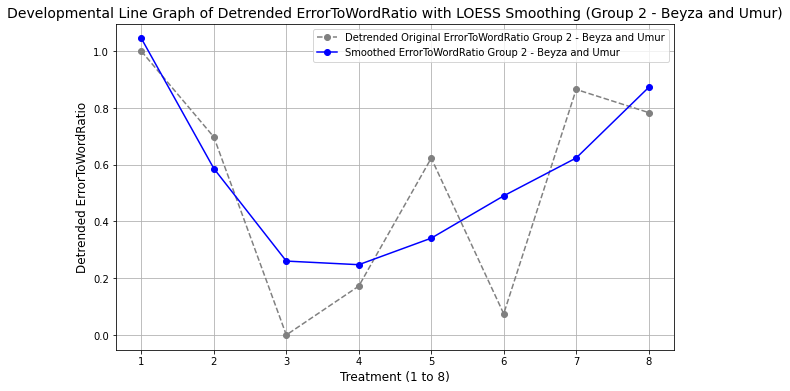

Figure 43. Developmental Line Graph of Detrended MLS with LOESS Smoothing for Group 2 - Ceren and Mihriban


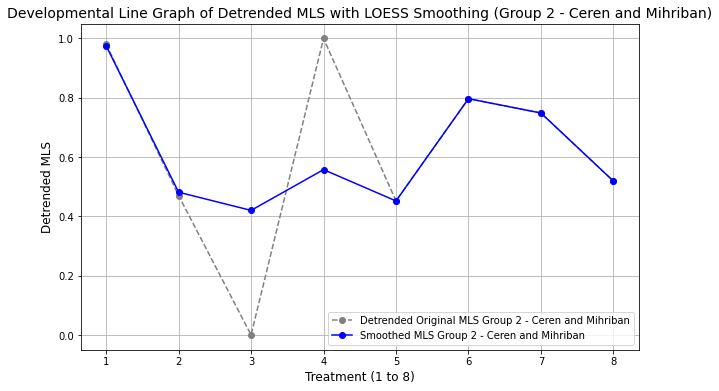

Figure 44. Developmental Line Graph of Detrended CN_C with LOESS Smoothing for Group 2 - Ceren and Mihriban


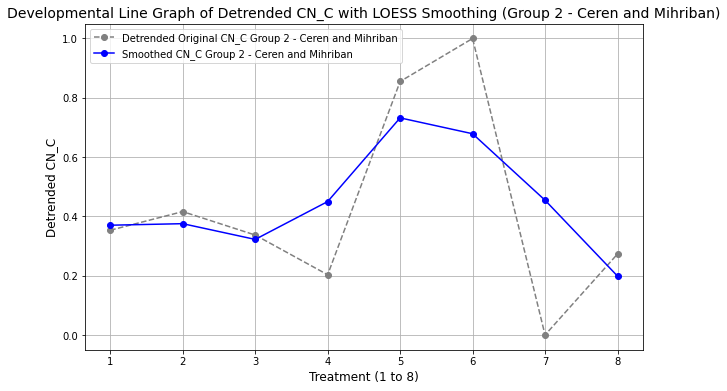

Figure 45. Developmental Line Graph of Detrended ErrorToWordRatio with LOESS Smoothing for Group 2 - Ceren and Mihriban


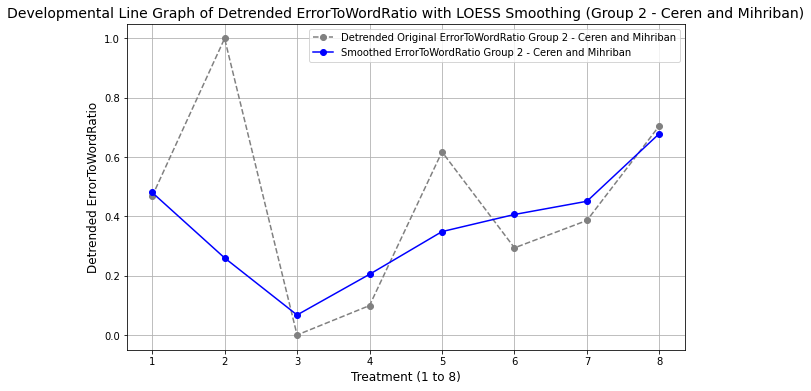

Figure 46. Developmental Line Graph of Detrended MLS with LOESS Smoothing for Group 2 - Damla and Sumeyye


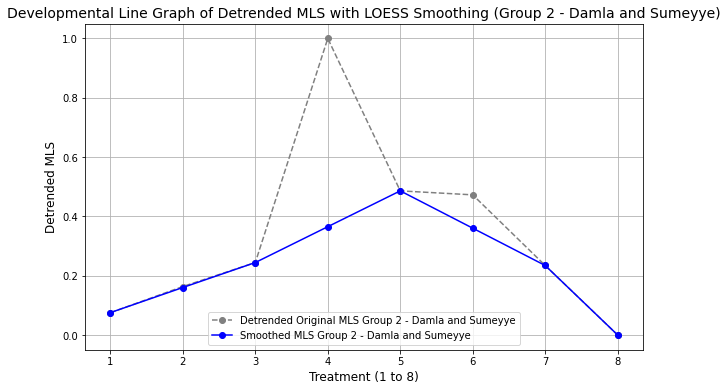

Figure 47. Developmental Line Graph of Detrended CN_C with LOESS Smoothing for Group 2 - Damla and Sumeyye


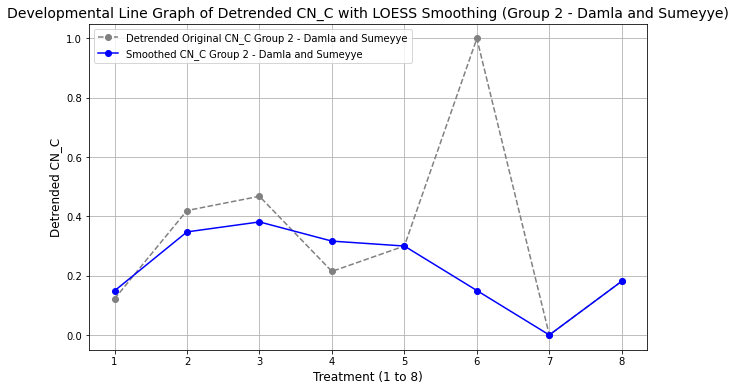

Figure 48. Developmental Line Graph of Detrended ErrorToWordRatio with LOESS Smoothing for Group 2 - Damla and Sumeyye


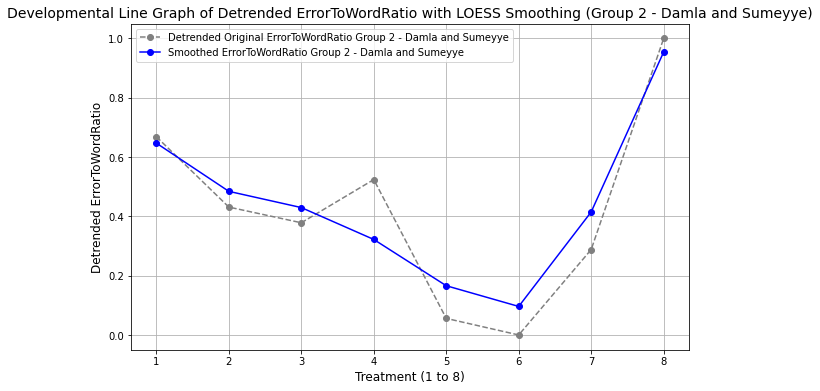

Figure 49. Developmental Line Graph of Detrended MLS with LOESS Smoothing for Group 2 - Fadime and Sura


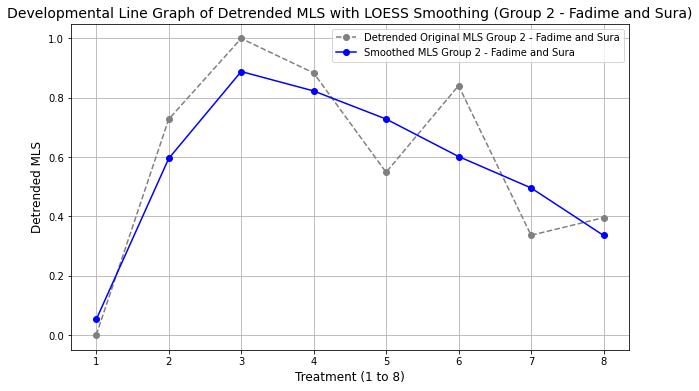

Figure 50. Developmental Line Graph of Detrended CN_C with LOESS Smoothing for Group 2 - Fadime and Sura


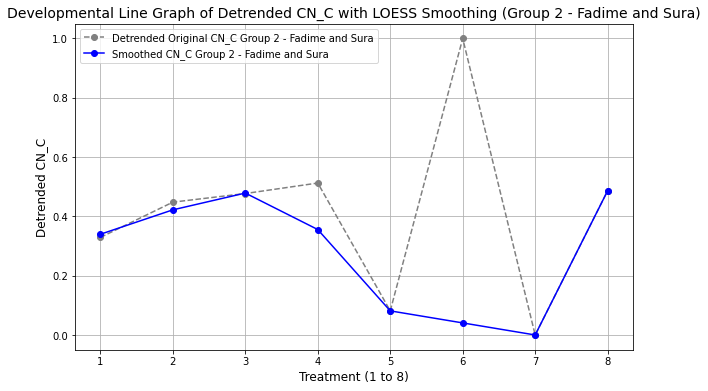

Figure 51. Developmental Line Graph of Detrended ErrorToWordRatio with LOESS Smoothing for Group 2 - Fadime and Sura


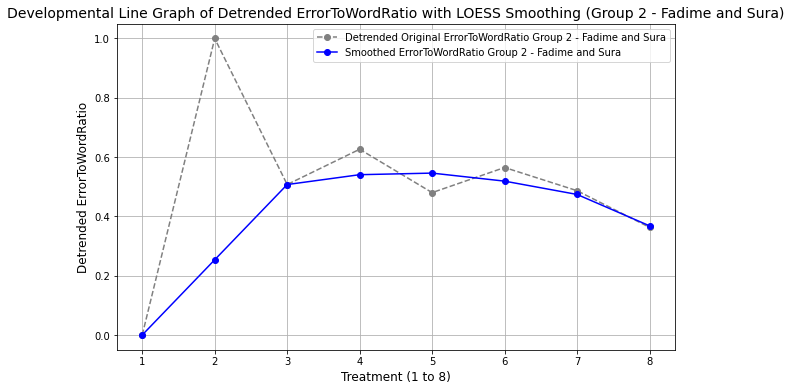

Figure 52. Developmental Line Graph of Detrended MLS with LOESS Smoothing for Group 2 - Fatma and Eren


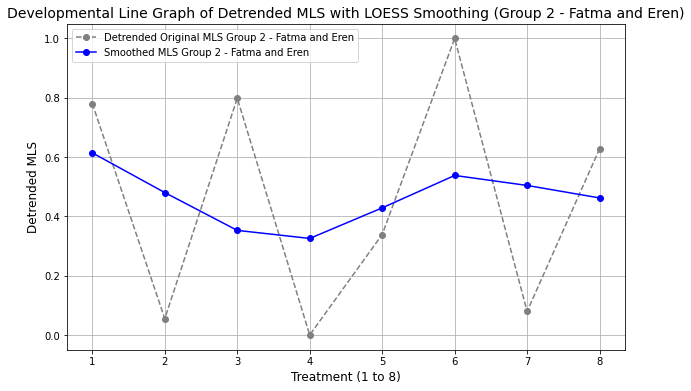

Figure 53. Developmental Line Graph of Detrended CN_C with LOESS Smoothing for Group 2 - Fatma and Eren


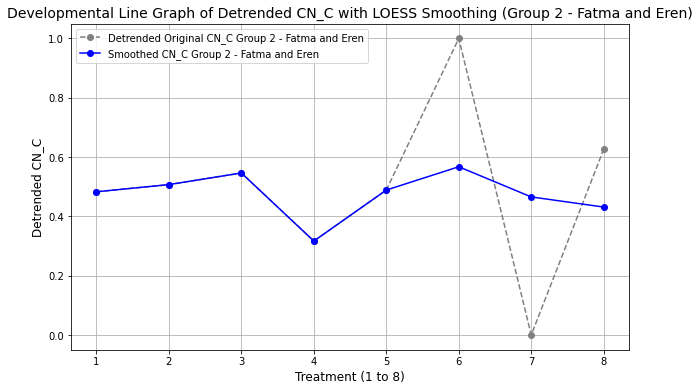

Figure 54. Developmental Line Graph of Detrended ErrorToWordRatio with LOESS Smoothing for Group 2 - Fatma and Eren


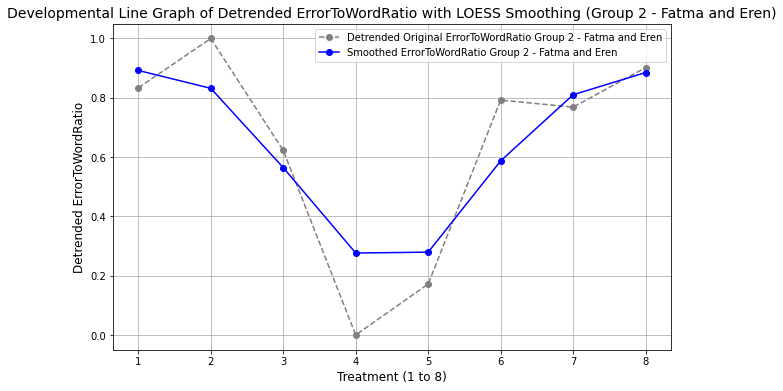

Figure 55. Developmental Line Graph of Detrended MLS with LOESS Smoothing for Group 2 - Songul and Esma


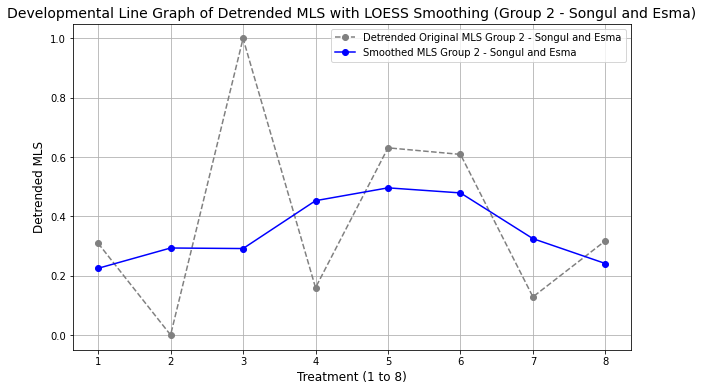

Figure 56. Developmental Line Graph of Detrended CN_C with LOESS Smoothing for Group 2 - Songul and Esma


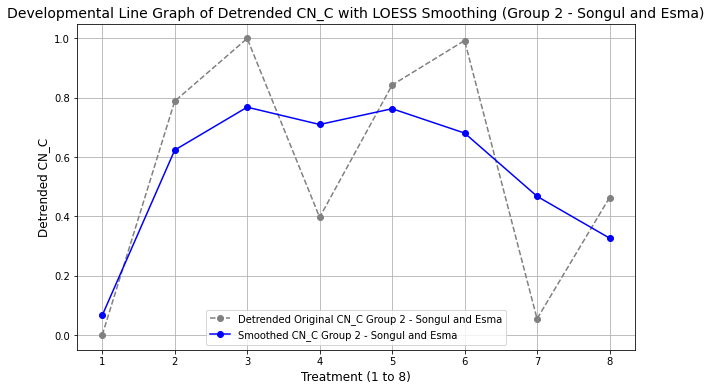

Figure 57. Developmental Line Graph of Detrended ErrorToWordRatio with LOESS Smoothing for Group 2 - Songul and Esma


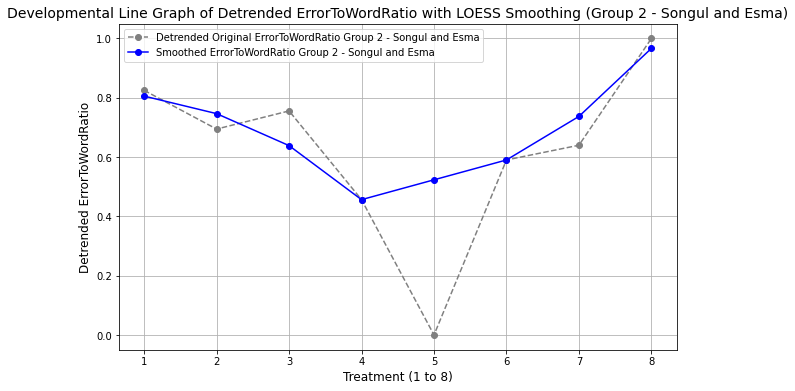

Figure 58. Developmental Line Graph of Detrended MLS with LOESS Smoothing for Group 2 - Zeynep and Elif


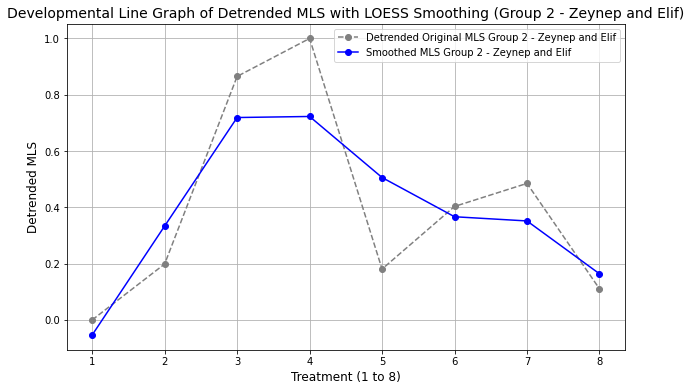

Figure 59. Developmental Line Graph of Detrended CN_C with LOESS Smoothing for Group 2 - Zeynep and Elif


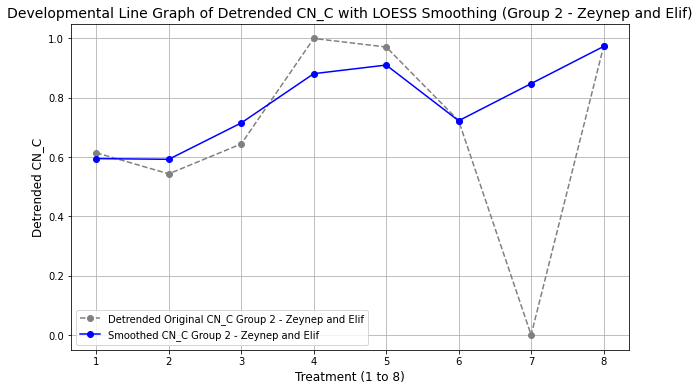

Figure 60. Developmental Line Graph of Detrended ErrorToWordRatio with LOESS Smoothing for Group 2 - Zeynep and Elif


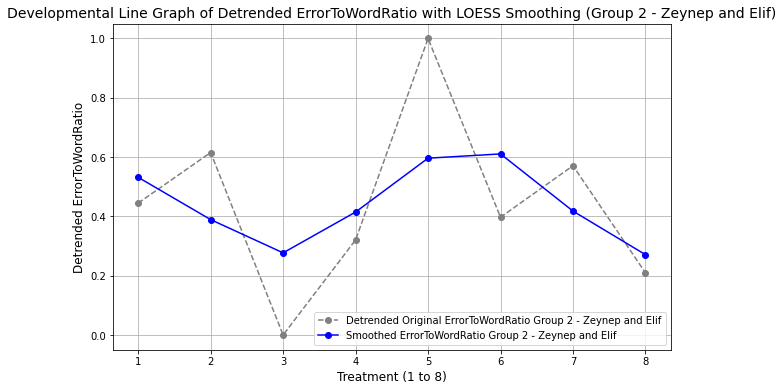

In [2]:
# Updated list of G2 peer group names for better display
g2_names_display = [
    'Group 2 - Abidin and Osman', 'Group 2 - Aleyna and Ceren', 'Group 2 - Ayse and Halime',
    'Group 2 - Beyza and Umur', 'Group 2 - Ceren and Mihriban', 'Group 2 - Damla and Sumeyye',
    'Group 2 - Fadime and Sura', 'Group 2 - Fatma and Eren', 'Group 2 - Songul and Esma', 
    'Group 2 - Zeynep and Elif'
]


# Starting figure number from 31
figure_number = 31

# Loop through all detrended G1 dataframes and apply LOESS for smoothing for each variable
for df_detrended, name_display in zip(g2_dataframes_detrended, g2_names_display):
    treatments = range(1, 9)
    
    # Plot MLS
    print(f"Figure {figure_number}. Developmental Line Graph of Detrended MLS with LOESS Smoothing for {name_display}")
    figure_number += 1
    plt.figure(figsize=(10, 6))
    lowess_mls = sm.nonparametric.lowess(df_detrended['MLS'], treatments, frac=0.5)
    smoothed_mls = lowess_mls[:, 1]
    plt.plot(treatments, df_detrended['MLS'], marker='o', linestyle='--', color='gray', label=f'Detrended Original MLS {name_display}')
    plt.plot(treatments, smoothed_mls, marker='o', linestyle='-', color='b', label=f'Smoothed MLS {name_display}')
    plt.title(f'Developmental Line Graph of Detrended MLS with LOESS Smoothing ({name_display})', fontsize=14)
    plt.xlabel('Treatment (1 to 8)', fontsize=12)
    plt.ylabel('Detrended MLS', fontsize=12)
    plt.xticks(treatments)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot CN_C
    print(f"Figure {figure_number}. Developmental Line Graph of Detrended CN_C with LOESS Smoothing for {name_display}")
    figure_number += 1
    plt.figure(figsize=(10, 6))
    lowess_cn_c = sm.nonparametric.lowess(df_detrended['CN_C'], treatments, frac=0.5)
    smoothed_cn_c = lowess_cn_c[:, 1]
    plt.plot(treatments, df_detrended['CN_C'], marker='o', linestyle='--', color='gray', label=f'Detrended Original CN_C {name_display}')
    plt.plot(treatments, smoothed_cn_c, marker='o', linestyle='-', color='b', label=f'Smoothed CN_C {name_display}')
    plt.title(f'Developmental Line Graph of Detrended CN_C with LOESS Smoothing ({name_display})', fontsize=14)
    plt.xlabel('Treatment (1 to 8)', fontsize=12)
    plt.ylabel('Detrended CN_C', fontsize=12)
    plt.xticks(treatments)
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot ErrorToWordRatio
    print(f"Figure {figure_number}. Developmental Line Graph of Detrended ErrorToWordRatio with LOESS Smoothing for {name_display}")
    figure_number += 1
    plt.figure(figsize=(10, 6))
    lowess_error = sm.nonparametric.lowess(df_detrended['ErrorToWordRatio'], treatments, frac=0.5)
    smoothed_error = lowess_error[:, 1]
    plt.plot(treatments, df_detrended['ErrorToWordRatio'], marker='o', linestyle='--', color='gray', label=f'Detrended Original ErrorToWordRatio {name_display}')
    plt.plot(treatments, smoothed_error, marker='o', linestyle='-', color='b', label=f'Smoothed ErrorToWordRatio {name_display}')
    plt.title(f'Developmental Line Graph of Detrended ErrorToWordRatio with LOESS Smoothing ({name_display})', fontsize=14)
    plt.xlabel('Treatment (1 to 8)', fontsize=12)
    plt.ylabel('Detrended ErrorToWordRatio', fontsize=12)
    plt.xticks(treatments)
    plt.legend()
    plt.grid(True)
    plt.show()
